<a href="https://colab.research.google.com/github/syllwia1015/zajecia_R/blob/main/Profiling_speed_dating_users.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('Speed Dating Data.csv', engine='python')

In [ ]:
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


# Preparing our dataset

In [ ]:
#Copy or assign?
#https://nedbatchelder.com/text/names.html
#https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html
#https://docs.python.org/3/faq/programming.html#why-did-changing-list-y-also-change-list-x
data_subset = data.loc[:, ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].copy()
#data_subset = data.loc[:, ['iid', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].copy()

In [ ]:
data_subset.head()
#Do you see something fishy here?

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,15.0,20.0,20.0,15.0,15.0,15.0
1,15.0,20.0,20.0,15.0,15.0,15.0
2,15.0,20.0,20.0,15.0,15.0,15.0
3,15.0,20.0,20.0,15.0,15.0,15.0
4,15.0,20.0,20.0,15.0,15.0,15.0


In [ ]:
data_subset.iloc[:30,:]

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,15.0,20.0,20.0,15.0,15.0,15.0
1,15.0,20.0,20.0,15.0,15.0,15.0
2,15.0,20.0,20.0,15.0,15.0,15.0
3,15.0,20.0,20.0,15.0,15.0,15.0
4,15.0,20.0,20.0,15.0,15.0,15.0
5,15.0,20.0,20.0,15.0,15.0,15.0
6,15.0,20.0,20.0,15.0,15.0,15.0
7,15.0,20.0,20.0,15.0,15.0,15.0
8,15.0,20.0,20.0,15.0,15.0,15.0
9,15.0,20.0,20.0,15.0,15.0,15.0


In [ ]:
data_subset.drop_duplicates(inplace=True)
data_subset.head()

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,15.0,20.0,20.0,15.0,15.0,15.0
10,45.0,5.0,25.0,20.0,0.0,5.0
20,35.0,10.0,35.0,10.0,10.0,0.0
30,20.0,20.0,20.0,20.0,10.0,10.0
40,20.0,5.0,25.0,25.0,10.0,15.0


In [ ]:
#BTW: how many dates each participant had?
data.groupby('iid').count().id.unique()

array([10, 16, 19, 18,  5, 20,  9, 21, 14,  8,  6, 15,  7, 22],
      dtype=int64)

In [ ]:
data['iid'].value_counts().value_counts()

10    102
18     75
20     58
16     51
22     44
21     42
14     38
19     34
15     30
9      28
6      27
5      10
8       6
7       6
Name: iid, dtype: int64

In [ ]:
#Check unique values for a given column (in this case "iid")
data.iid.unique().shape

(551,)

In [ ]:
data_subset.shape

(473, 6)

In [ ]:
data_subset = data.loc[:, ['iid', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].copy()
data_subset.drop_duplicates(inplace=True)
data_subset.drop(columns='iid', inplace=True)

In [ ]:
data_subset

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,15.0,20.0,20.0,15.0,15.0,15.0
10,45.0,5.0,25.0,20.0,0.0,5.0
20,35.0,10.0,35.0,10.0,10.0,0.0
30,20.0,20.0,20.0,20.0,10.0,10.0
40,20.0,5.0,25.0,25.0,10.0,15.0
...,...,...,...,...,...,...
8268,40.0,10.0,20.0,10.0,0.0,20.0
8290,20.0,20.0,20.0,20.0,0.0,20.0
8312,30.0,3.0,30.0,30.0,3.0,4.0
8334,40.0,20.0,20.0,20.0,0.0,0.0


# K-means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
scaler = StandardScaler()
data_subset_scaled = scaler.fit_transform(data_subset)
data_subset_scaled

array([[-0.5930158 ,  0.37638359, -0.02480521, -0.39632191,  0.67383642,
         0.48976753],
       [ 1.72180107, -1.70749996,  0.70271432,  0.41204866, -1.73643866,
        -1.05627718],
       [ 0.95019544, -1.01287211,  2.15775337, -1.20469247, -0.1295886 ,
        -1.82929954],
       ...,
       [ 0.56439263, -1.98535111,  1.43023385,  2.02878979, -1.25438364,
        -1.21088165],
       [ 1.33599825,  0.37638359, -0.02480521,  0.41204866, -1.73643866,
        -1.82929954],
       [ 3.65081512, -2.40212782, -0.75232473, -0.39632191, -1.73643866,
        -1.82929954]])

In [ ]:
data_subset_scaled.mean(axis=0)

array([nan, nan, nan, nan, nan, nan])

In [ ]:
#print(data_subset.to_string())

In [ ]:
#data_subset_scaled.dropna(inplace=True)

In [ ]:
data_subset.dropna(inplace=True)
data_subset_scaled = scaler.fit_transform(data_subset)
data_subset_scaled.mean(axis=0) #You can also check var

array([-7.88032609e-17,  3.71032020e-16, -2.39693252e-16, -2.74169679e-16,
       -3.02079167e-16, -3.94016304e-17])

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = kmeans.fit_predict(data_subset_scaled)

In [ ]:
labels

array([0, 1, 3, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 0, 1, 3, 0, 1, 1, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 2, 3, 3, 3, 2, 0, 2, 1, 0, 2, 2, 0, 3, 2, 3,
       0, 2, 2, 2, 2, 3, 2, 1, 1, 3, 0, 0, 0, 0, 2, 3, 0, 0, 0, 2, 2, 1,
       2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 2, 0, 3,
       0, 2, 0, 0, 0, 1, 1, 3, 3, 1, 2, 1, 2, 2, 3, 2, 3, 3, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 0, 0, 3, 1, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 2, 2, 0, 3, 2, 0, 2, 0,
       2, 2, 2, 0, 2, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 3, 2, 0, 0, 3, 0, 3,
       2, 2, 2, 0, 3, 1, 2, 3, 3, 0, 2, 1, 2, 2, 0, 0, 2, 0, 3, 0, 0, 2,
       3, 0, 3, 0, 0, 0, 0, 2, 1, 3, 2, 0, 0, 0, 0,

In [ ]:
data_subset

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,15.0,20.0,20.0,15.0,15.0,15.0
10,45.0,5.0,25.0,20.0,0.0,5.0
20,35.0,10.0,35.0,10.0,10.0,0.0
30,20.0,20.0,20.0,20.0,10.0,10.0
40,20.0,5.0,25.0,25.0,10.0,15.0
...,...,...,...,...,...,...
8268,40.0,10.0,20.0,10.0,0.0,20.0
8290,20.0,20.0,20.0,20.0,0.0,20.0
8312,30.0,3.0,30.0,30.0,3.0,4.0
8334,40.0,20.0,20.0,20.0,0.0,0.0


# Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_subset_pca = pca.fit_transform(data_subset_scaled)
data_subset_pca

array([[-1.06883583, -0.24384617],
       [ 2.93912376,  0.28688268],
       [ 1.40210318, -0.49362225],
       ...,
       [ 2.12141862,  2.22792951],
       [ 2.37506418, -0.19668703],
       [ 5.03191765, -0.55988408]])

In [ ]:
data_subset_tf = pd.concat([pd.DataFrame(data_subset_pca, columns=['PC1', 'PC2']), 
                           pd.DataFrame(labels, columns=['labels'])], axis=1)
data_subset_tf

,PC1,PC2,labels
0,-1.068836,-0.243846,0
1,2.939124,0.286883,1
2,1.402103,-0.493622,3
3,-0.049878,0.293194,2
4,0.320669,1.558745,2
...,...,...,...
536,1.398325,-1.715282,1
537,-0.025113,-0.425477,0
538,2.121419,2.227930,2
539,2.375064,-0.196687,1


C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning

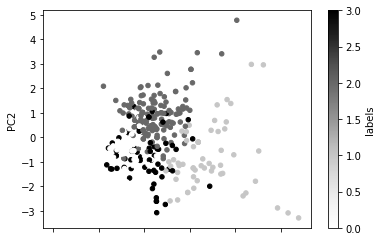

In [ ]:
data_subset_tf.plot.scatter(x='PC1', y='PC2', c='labels')

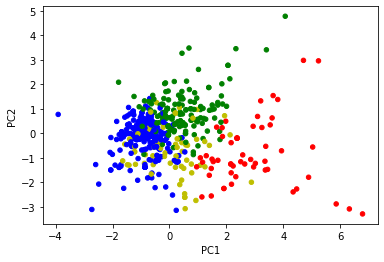

In [ ]:
data_subset_tf.plot.scatter(x='PC1', y='PC2', c=data_subset_tf.labels.replace([0, 1, 2, 3], ['b', 'r', 'g', 'y']))

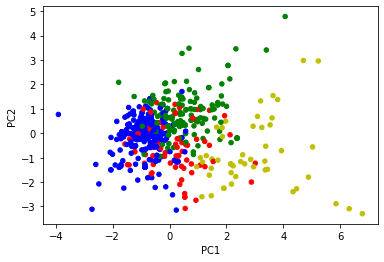

In [ ]:
#Saving image
plot = data_subset_tf.plot.scatter(x='PC1', y='PC2', c=data_subset_tf.labels.replace([0, 1, 2, 3], ['b', 'r', 'g', 'y']))
fig = plot.get_figure()
fig.savefig("our_first_results.png", dpi=600)

In [ ]:
#'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1'
print(pca.components_)

[[ 0.67259072 -0.36554424 -0.17304574  0.08781762 -0.43347614 -0.4340977 ]
 [-0.25319553 -0.3409248   0.04114646  0.8444856   0.25236979 -0.20278767]]


In [ ]:
import numpy as np
#Check what's the score for someone interested only in attractive people
#np.matmul(pca.components_, np.array([100, 0, 0, 0, 0, 0]))

#Check what's the score for someone interested in fun people
np.matmul(pca.components_, np.array([10, 10, 0, 70, 10, 0]))

array([ 4.88293652, 55.69648629])

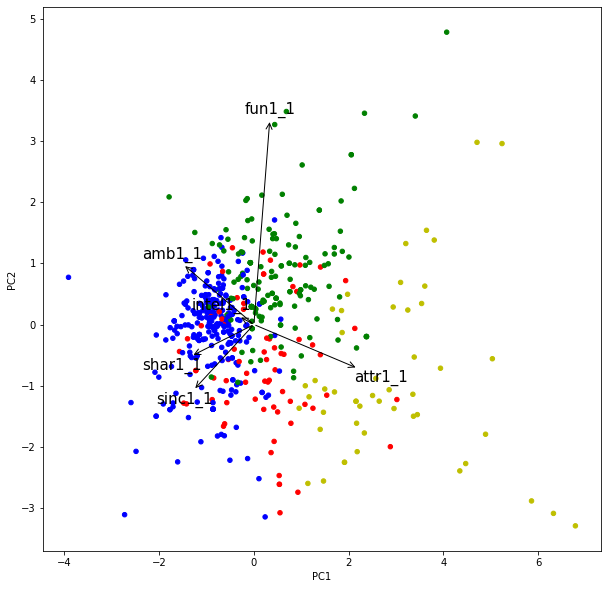

In [ ]:
import matplotlib.pyplot as plt

data_subset_tf.plot.scatter(x='PC1', y='PC2', c=data_subset_tf.labels.replace([0, 1, 2, 3], ['b', 'r', 'g', 'y']), figsize=(10,10))
#plt.arrow(0, 0, pca.components_[0,0]*6, pca.components_[0,1]*6, shape='left')
for i, colname in enumerate(data_subset.columns):
    plt.annotate(colname, ha='center', va='bottom', xy=(0, 0), size=15,
             xytext=(pca.components_[0,i]*4, pca.components_[1,i]*4), 
             arrowprops = {'arrowstyle':'<-'})

# how many clusters?

There are multiple methods, out of which the most popular are:
- Elbow method 
- Silhouette 

In [ ]:
#Elbow method taken from: https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

Text(0, 0.5, 'WSS')

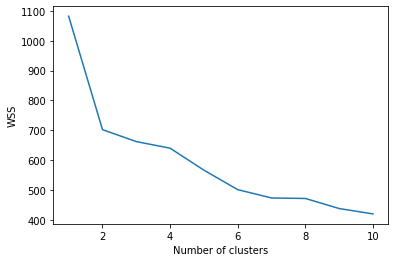

In [ ]:
plt.plot(np.linspace(1, 10, 10), calculate_WSS(data_subset_scaled, 10))
plt.xlabel('Number of clusters')
plt.ylabel('WSS')